In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import simulate as sim
import kalman as kf

from scipy.stats import norm
from matplotlib import cm
from importlib import reload
from scipy.optimize import fmin, minimize

# Simulating Data

In [17]:
# true_params = [3.37776282, 0.10125896, -0.32429652, -0.24495863, 0.15412752]

In [23]:
true_params = [1.8, 0.01, -0.29, -0.6, 0.1]

In [24]:
# S0 = 149.54
S0 = 100
T = 30
# r = 0.0245
r = 0.15
q = 0
N = 10000

In [25]:
y = sim.simulate_heston_state(true_params, S0, r, N=N) 

### simulate path and ekf generated path

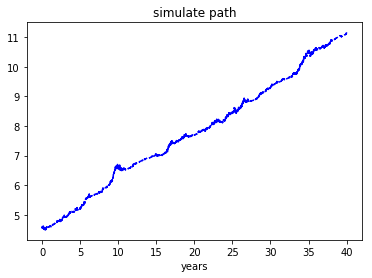

In [26]:
years = np.arange(y.shape[-1]-1) * (1/250)
plt.plot(years, y[0,1:].T, 'b--')
plt.title('simulate path')
plt.xlabel('years')
plt.show()

# neg vol: [[459]]


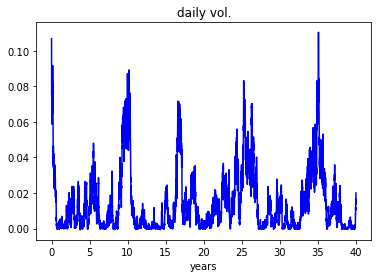

In [27]:
print("# neg vol:", sum(y[1,1:].T<0))
plt.plot(years, y[1,1:].T, 'b-')
plt.title('daily vol.')
plt.xlabel('years')
plt.show()

# EKF and Parameter Estimation

In [36]:
init_params = [3, 0.2, -0.05, -0.1, 0.4]

### Initial path vs. true path

In [37]:
y_ = sim.simulate_heston_state(init_params, S0, r, N=N) 

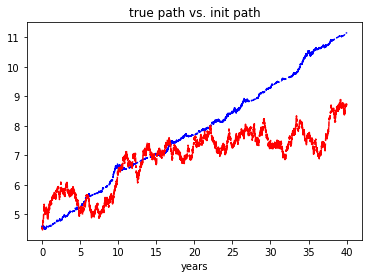

In [38]:
plt.plot(years, y[0,1:].T, 'b--')
plt.plot(years, y_[0,1:].T, 'r--')
plt.title('true path vs. init path')
plt.xlabel('years')
plt.show()

# neg vol: [[459]]


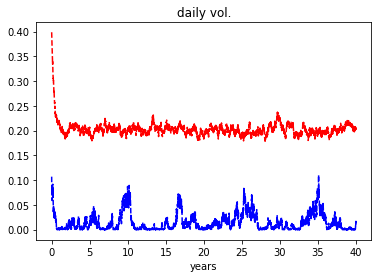

In [39]:
print("# neg vol:", sum(y[1,1:].T<0))
plt.plot(years, y[1,1:].T, 'b--')
plt.plot(years, y_[1,1:].T, 'r--')
plt.title('daily vol.')
plt.xlabel('years')
plt.show()

### Note: Optimization takes time...

In [40]:
def wrap_heston_obj(params, *args):
    y = args[0]
    S0 = args[1]
    r = args[2]
    return kf.ekf_heston_obj(y, params, S0, r)

In [41]:
num_iter = 1
def callbackF(xi):
    global num_iter
    global arg
    print('i: ' + str(num_iter))
    print('x_i: ' + str(xi))
    print('f_i: ' + str(wrap_heston_obj(xi, *args)))
    num_iter += 1

In [42]:
args = (y[0,:].T, S0, r)
maxiter = 1000

In [44]:
print("Init params: {}".format(init_params))
print("True Params: {}".format(true_params))

Init params: [3, 0.2, -0.05, -0.1, 0.4]
True Params: [1.8, 0.01, -0.29, -0.6, 0.1]


In [45]:
xopt, fopt, _, _, _ = fmin(wrap_heston_obj, init_params, args=args, maxiter=maxiter, callback=callbackF, 
                           disp=True, retall=False, full_output=True)

i: 1
x_i: [ 3.09    0.18   -0.0515 -0.103   0.412 ]
f_i: -6427.386514456292
i: 2
x_i: [ 3.09    0.18   -0.0515 -0.103   0.412 ]
f_i: -6427.386514456292
i: 3
x_i: [ 3.09    0.18   -0.0515 -0.103   0.412 ]
f_i: -6427.386514456292
i: 4
x_i: [ 3.09    0.18   -0.0515 -0.103   0.412 ]
f_i: -6427.386514456292
i: 5
x_i: [ 3.395136   0.167072  -0.0529856 -0.1030912  0.3962368]
f_i: -6503.17695785989
i: 6
x_i: [ 3.2422176   0.1473152  -0.05477696 -0.10494592  0.39397888]
f_i: -6607.960658675035
i: 7
x_i: [ 3.2422176   0.1473152  -0.05477696 -0.10494592  0.39397888]
f_i: -6607.960658675035
i: 8
x_i: [ 3.47488742  0.12262605 -0.05257239 -0.11302286  0.41172869]
f_i: -6765.840535637097
i: 9
x_i: [ 3.47488742  0.12262605 -0.05257239 -0.11302286  0.41172869]
f_i: -6765.840535637097
i: 10
x_i: [ 3.93511743  0.06990155 -0.05865831 -0.11219553  0.39406875]
f_i: -7254.714095311641
i: 11
x_i: [ 3.93511743  0.06990155 -0.05865831 -0.11219553  0.39406875]
f_i: -7254.714095311641
i: 12
x_i: [ 3.93535706  0.0

i: 78
x_i: [ 7.79083805e+00  3.10553290e-03 -6.93519426e-02 -1.14872326e-01
  1.96099524e-01]
f_i: -9094.77380754277
i: 79
x_i: [ 7.79083805e+00  3.10553290e-03 -6.93519426e-02 -1.14872326e-01
  1.96099524e-01]
f_i: -9094.77380754277
i: 80
x_i: [ 7.79083805e+00  3.10553290e-03 -6.93519426e-02 -1.14872326e-01
  1.96099524e-01]
f_i: -9094.77380754277
i: 81
x_i: [ 8.48630167e+00  3.62419957e-03 -6.96810008e-02 -1.11218482e-01
  1.82639737e-01]
f_i: -9108.905737337705
i: 82
x_i: [ 8.48630167e+00  3.62419957e-03 -6.96810008e-02 -1.11218482e-01
  1.82639737e-01]
f_i: -9108.905737337705
i: 83
x_i: [ 8.48630167e+00  3.62419957e-03 -6.96810008e-02 -1.11218482e-01
  1.82639737e-01]
f_i: -9108.905737337705
i: 84
x_i: [ 8.48630167e+00  3.62419957e-03 -6.96810008e-02 -1.11218482e-01
  1.82639737e-01]
f_i: -9108.905737337705
i: 85
x_i: [ 8.06113599e+00  3.87529618e-03 -6.96496151e-02 -1.13462907e-01
  1.87039730e-01]
f_i: -9112.338095154937
i: 86
x_i: [ 8.06113599e+00  3.87529618e-03 -6.96496151e-02

i: 148
x_i: [ 5.69418727e+00  3.75483182e-03 -7.70218158e-02 -1.30789256e-01
  6.24608698e-02]
f_i: -9129.269065318405
i: 149
x_i: [ 5.69418727e+00  3.75483182e-03 -7.70218158e-02 -1.30789256e-01
  6.24608698e-02]
f_i: -9129.269065318405
i: 150
x_i: [ 5.69418727e+00  3.75483182e-03 -7.70218158e-02 -1.30789256e-01
  6.24608698e-02]
f_i: -9129.269065318405
i: 151
x_i: [ 5.69418727e+00  3.75483182e-03 -7.70218158e-02 -1.30789256e-01
  6.24608698e-02]
f_i: -9129.269065318405
i: 152
x_i: [ 5.62372051e+00  3.75682063e-03 -7.71140709e-02 -1.31220957e-01
  6.13858606e-02]
f_i: -9129.27216716381
i: 153
x_i: [ 5.65391136e+00  3.75292569e-03 -7.70542314e-02 -1.31021959e-01
  6.22837905e-02]
f_i: -9129.273781731048
i: 154
x_i: [ 5.65391136e+00  3.75292569e-03 -7.70542314e-02 -1.31021959e-01
  6.22837905e-02]
f_i: -9129.273781731048
i: 155
x_i: [ 5.65962838e+00  3.76497508e-03 -7.70673586e-02 -1.30998997e-01
  6.19336373e-02]
f_i: -9129.27417762371
i: 156
x_i: [ 5.63938189e+00  3.76225782e-03 -7.71

i: 217
x_i: [ 5.64570249e+00  3.76443894e-03 -7.71663492e-02 -1.31122594e-01
  6.12423340e-02]
f_i: -9129.289023086458
i: 218
x_i: [ 5.65270001e+00  3.76958612e-03 -7.72214991e-02 -1.31108145e-01
  6.10377764e-02]
f_i: -9129.29654069414
i: 219
x_i: [ 5.65270001e+00  3.76958612e-03 -7.72214991e-02 -1.31108145e-01
  6.10377764e-02]
f_i: -9129.29654069414
i: 220
x_i: [ 5.65270001e+00  3.76958612e-03 -7.72214991e-02 -1.31108145e-01
  6.10377764e-02]
f_i: -9129.29654069414
i: 221
x_i: [ 5.64990983e+00  3.75604303e-03 -7.71943579e-02 -1.31113299e-01
  6.11810026e-02]
f_i: -9129.296923708105
i: 222
x_i: [ 5.63691901e+00  3.75522343e-03 -7.72765737e-02 -1.31225227e-01
  6.04754821e-02]
f_i: -9129.30187158697
i: 223
x_i: [ 5.64746406e+00  3.76592042e-03 -7.73531750e-02 -1.31198410e-01
  6.03315982e-02]
f_i: -9129.313662481944
i: 224
x_i: [ 5.64746406e+00  3.76592042e-03 -7.73531750e-02 -1.31198410e-01
  6.03315982e-02]
f_i: -9129.313662481944
i: 225
x_i: [ 5.64746406e+00  3.76592042e-03 -7.7353

i: 286
x_i: [ 5.35747365e+00  3.53419797e-03 -9.32942877e-02 -1.38626731e-01
  6.39593251e-02]
f_i: -9131.924038575997
i: 287
x_i: [ 5.35747365e+00  3.53419797e-03 -9.32942877e-02 -1.38626731e-01
  6.39593251e-02]
f_i: -9131.924038575997
i: 288
x_i: [ 5.35747365e+00  3.53419797e-03 -9.32942877e-02 -1.38626731e-01
  6.39593251e-02]
f_i: -9131.924038575997
i: 289
x_i: [ 5.36485128e+00  3.44880476e-03 -1.01797382e-01 -1.41616926e-01
  7.18295059e-02]
f_i: -9132.182899994026
i: 290
x_i: [ 5.36485128e+00  3.44880476e-03 -1.01797382e-01 -1.41616926e-01
  7.18295059e-02]
f_i: -9132.182899994026
i: 291
x_i: [ 5.44761829e+00  3.52282965e-03 -1.00483356e-01 -1.40672205e-01
  7.21862995e-02]
f_i: -9133.240823842894
i: 292
x_i: [ 5.44761829e+00  3.52282965e-03 -1.00483356e-01 -1.40672205e-01
  7.21862995e-02]
f_i: -9133.240823842894
i: 293
x_i: [ 5.44761829e+00  3.52282965e-03 -1.00483356e-01 -1.40672205e-01
  7.21862995e-02]
f_i: -9133.240823842894
i: 294
x_i: [ 5.44761829e+00  3.52282965e-03 -1.

f_i: -9172.015590639823
i: 356
x_i: [ 5.68640476e+00  3.65294975e-03 -2.80872809e-01 -2.06118240e-01
  7.67403707e-02]
f_i: -9172.02186219097
i: 357
x_i: [ 5.68640476e+00  3.65294975e-03 -2.80872809e-01 -2.06118240e-01
  7.67403707e-02]
f_i: -9172.02186219097
i: 358
x_i: [ 5.68640476e+00  3.65294975e-03 -2.80872809e-01 -2.06118240e-01
  7.67403707e-02]
f_i: -9172.02186219097
i: 359
x_i: [ 5.69429820e+00  3.64659378e-03 -2.82049708e-01 -2.06526858e-01
  7.58679813e-02]
f_i: -9172.025971979725
i: 360
x_i: [ 5.69024206e+00  3.64167005e-03 -2.80057390e-01 -2.05813799e-01
  7.57182028e-02]
f_i: -9172.025999243035
i: 361
x_i: [ 5.69024206e+00  3.64167005e-03 -2.80057390e-01 -2.05813799e-01
  7.57182028e-02]
f_i: -9172.025999243035
i: 362
x_i: [ 5.68758608e+00  3.64966493e-03 -2.81376135e-01 -2.06301896e-01
  7.65683980e-02]
f_i: -9172.02621890934
i: 363
x_i: [ 5.67150025e+00  3.65276097e-03 -2.80671084e-01 -2.06146424e-01
  7.53210188e-02]
f_i: -9172.0282682906
i: 364
x_i: [ 5.67150025e+00  

In [46]:
print("Optimal params: {}".format(xopt))
print("True Params: {}".format(true_params))

Optimal params: [ 5.68564672e+00  3.65047353e-03 -2.81224693e-01 -2.06267658e-01
  7.58382638e-02]
True Params: [1.8, 0.01, -0.29, -0.6, 0.1]


In [47]:
y_ = sim.simulate_heston_state(xopt, S0, r, N=N) 

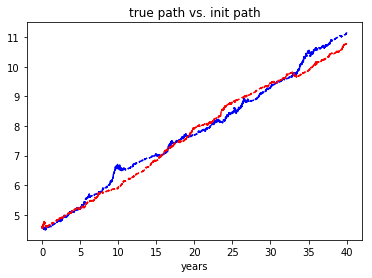

In [48]:
plt.plot(years, y[0,1:].T, 'b--')
plt.plot(years, y_[0,1:].T, 'r--')
plt.title('true path vs. init path')
plt.xlabel('years')
plt.show()

# neg vol: [[459]]


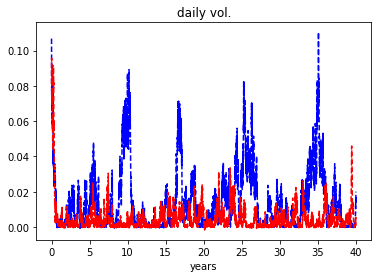

In [49]:
print("# neg vol:", sum(y[1,1:].T<0))
plt.plot(years, y[1,1:].T, 'b--')
plt.plot(years, y_[1,1:].T, 'r--')
plt.title('daily vol.')
plt.xlabel('years')
plt.show()